In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Midterm project

Congratulations! You've been hired as a data scientist at the hottest new social media startup.

Your company produces an app via which users can post short videos for anyone to view. They can also like, repost, and comment on the videos they view. The key data product is a recommendation engine that determines the order in which videos are shown to a user.

The recommendation engine has a parameter, *theta*, that affects the ordering of the videos. Recently the team of engineers that works on the recommendation engine ran it with different settings of *theta* and, for each setting, measured the amount of time users spent on the app. They have collected these measurements into a data set of 20 samples of (*theta*, *time_spent*) pairs.

Additionally, they have identified two auxiliary features (*aux1* and *aux2*) that they hypoithesize should correlate with *time_spent*. These two features are measures of time spent by users in the recent past. The engineers have not verified that the features explain *time_spent*.

(The engineers call these two features "auxiliary" because, while they might help explain *time_spent*, the engineers' ultimate interest lies in the dependence of *time_spent* on *theta*.)

Your first project at your new company is to tell the engineers which setting you think they should use for *theta*, based on the data.

## 1. Prepare the data
- Inspect the data. Identifiy and remove any suspicious or unusable samples.
- Put the samples in a data structure that you can work with.

In [46]:
theta = [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079,
       0.28298816, 0.294665  , 0.3578136 , 0.48352862, 0.53058676,
       0.55175137, 0.57560289, 0.59751325, 0.6375209 , 0.65241862,
       0.65633352, 0.78698546, 0.8640421 , 0.87729053, 0.94568319]
aux1 = [ 0.53983961, -1.77528229,  1.31487654, -0.47344805, -1.0922299 ,
       -0.25002744, -0.9822943 ,  1.03126909,  0.49133378, -0.4466466 ,
       -0.80636008,  0.13126776, -1.21256024,  0.15999085, -0.75522304,
        0.34989599,  0.97754176, -0.13858525,  0.10385631,  0.30059104]
aux2 = [ 0.9682053 ,  0.86962384,  0.56778309,  0.46528234, -1.16537308,
       -2.03599479, -1.15541329,  3.34515739,  0.12672721, -0.6941789 ,
        0.55767443,  0.0991466 ,  0.63792617,  0.70311068, -0.91609315,
       -0.78601423,  1.1191818 , -0.98339611,  0.24452002, -0.58140974]
time_spent = [10.79768391, 10.87648065, 10.29274937, 10.78756647,  9.51844772,
        9.18078781,  9.90063639, 12.84823357, 10.92743478,  9.88927608,
       11.3373709 , 11.43996915, 11.88392171, -11.88135476, 11.73452467,
       11.18844425, 12.19144316, 11.35294826, 12.2385441 , 11.98428985]

In [47]:
data = {'theta':theta, 'aux1':aux1, 'aux2':aux2, 'time_spent':time_spent}
df = pd.DataFrame(data)
df

,theta,aux1,aux2,time_spent
0,0.039063,0.539840,0.968205,10.797684
1,0.051194,-1.775282,0.869624,10.876481
2,0.060045,1.314877,0.567783,10.292749
3,0.067900,-0.473448,0.465282,10.787566
4,0.191521,-1.092230,-1.165373,9.518448
5,0.282988,-0.250027,-2.035995,9.180788
6,0.294665,-0.982294,-1.155413,9.900636
7,0.357814,1.031269,3.345157,12.848234
8,0.483529,0.491334,0.126727,10.927435
9,0.530587,-0.446647,-0.694179,9.889276


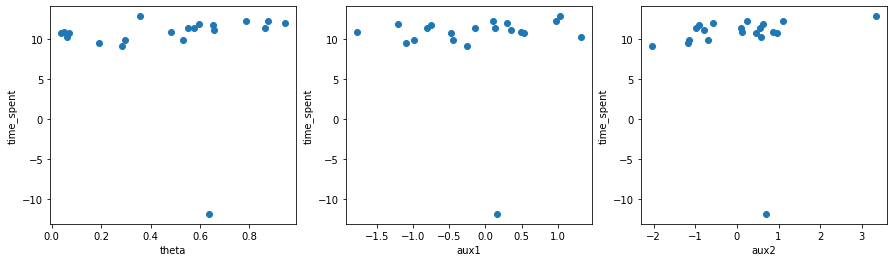

In [48]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
x = df['theta']
y = df['time_spent']
plt.plot(x,y,'o')
plt.xlabel("theta")
plt.ylabel("time_spent");
######################
plt.subplot(1,3,2)
x = df['aux1']
y = df['time_spent']
plt.plot(x,y,'o')
plt.xlabel("aux1")
plt.ylabel("time_spent");
######################
plt.subplot(1,3,3)
x = df['aux2']
y = df['time_spent']
plt.plot(x,y,'o')
plt.xlabel("aux2")
plt.ylabel("time_spent");

From these four plots, we can know that there is data that is far away from other data. This data will influence our analysis and so we need to remove it. Our next step is to try to find out this data and remove it.

In [49]:
def findNonormaldata(data):
    '''
    This method needs a data set and it will find which one is far away from its mean. Then return the index of this data.
    '''
    mean = data.mean()
    index = -1
    maxnum = -1
    for i in range(len(data)):
        if maxnum<((data[i]-mean)**2):
            maxnum = (data[i]-mean)**2
            index = i
    return index

In [50]:
innormal_time_spent = findNonormaldata(df['time_spent'])
innormal_time_spent

13

In [51]:
df['time_spent'][innormal_time_spent]

-11.88135476

In [52]:
df1 = df.drop(innormal_time_spent)
df1

,theta,aux1,aux2,time_spent
0,0.039063,0.539840,0.968205,10.797684
1,0.051194,-1.775282,0.869624,10.876481
2,0.060045,1.314877,0.567783,10.292749
3,0.067900,-0.473448,0.465282,10.787566
4,0.191521,-1.092230,-1.165373,9.518448
5,0.282988,-0.250027,-2.035995,9.180788
6,0.294665,-0.982294,-1.155413,9.900636
7,0.357814,1.031269,3.345157,12.848234
8,0.483529,0.491334,0.126727,10.927435
9,0.530587,-0.446647,-0.694179,9.889276


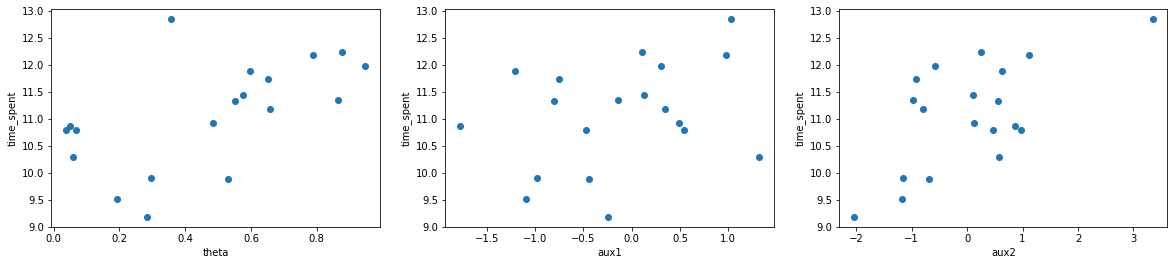

In [53]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
x = df1['theta']
y = df1['time_spent']
plt.plot(x,y,'o')
plt.xlabel("theta")
plt.ylabel("time_spent");
######################
plt.subplot(1,3,2)
x = df1['aux1']
y = df1['time_spent']
plt.plot(x,y,'o')
plt.xlabel("aux1")
plt.ylabel("time_spent");
######################
plt.subplot(1,3,3)
x = df1['aux2']
y = df1['time_spent']
plt.plot(x,y,'o')
plt.xlabel("aux2")
plt.ylabel("time_spent");

I remove the data which index is 13 and prepare the data into Pandas.DataFrame.

## 2. Build a model  

Write functions to run a regression, calculate the regression statistics listed below, and print a report.
- B (regressor coefficients plus one for an intercept, if appropriate)
- R2
- RSS
- RegSS
- TSS
- t statistic for each regressor coefficient

I found it useful to decompose the problem into three functions: `regress_calc()`, `regress_tstat()`, and `regress_report()`. You may write it however you see fit.  

You may include either, both, or neither of *aux1* and *aux2* in your final model. Experiment. What works best? Justify your decision.

In [397]:
class regress_report:
    def regress_report_one(self):
        print(f'The A = {self.A}, B = {self.B}, R2 = {self.R2}, RSS = {self.RSS}, RegSS = {self.RegSS}, TSS = {self.TSS}, t_A = {self.t_A}, t_B = {self.t_B}')
    def regress_report_two(self):
        print(f'The B1 = {self.B1}, B2 = {self.B2}, R2 = {self.R2}, RSS = {self.RSS}, RegSS = {self.RegSS}, TSS = {self.TSS}, t_B1 = {self.t_B1}, t_B2 = {self.t_B2}')
    def regress_report_three(self):
        print(f'The B1 = {self.B1}, B2 = {self.B2}, B3 = {self.B2}, R2 = {self.R2}, RSS = {self.RSS}, RegSS = {self.RegSS}, TSS = {self.TSS}, t_B1 = {self.t_B1}, t_B2 = {self.t_B2}, t_B3 = {self.t_B3}')

In [398]:
def regress_calc(x, y, A, B, regress_report):
    yhat = A + B*x
    eps = y - yhat
    TSS = ( (y-y.mean())**2 ).sum()
    RSS = ( (y-yhat)**2 ).sum()
    RegSS = TSS - RSS
    R2 = RegSS / TSS
    regress_report.R2 = R2
    regress_report.RSS = RSS
    regress_report.RegSS = RegSS
    regress_report.TSS = TSS
    print(f'R2 = {R2}, RSS = {RSS}, RegSS = {RegSS}, TSS = {TSS}')

In [399]:
def regress_calc_two(x1, x2, y, A, B1, B2, regress_report):
    yhat = A + B1*x1+B2*x2
    eps = y - yhat
    TSS = ( (y-y.mean())**2 ).sum()
    RSS = ( (y-yhat)**2 ).sum()
    RegSS = TSS - RSS
    R2 = RegSS / TSS
    regress_report.R2 = R2
    regress_report.RSS = RSS
    regress_report.RegSS = RegSS
    regress_report.TSS = TSS
    print(f'R2 = {R2}, RSS = {RSS}, RegSS = {RegSS}, TSS = {TSS}')

In [400]:
def regress_calc_three(x1, x2, x3 , y, A, B1, B2, B3, regress_report):
    yhat = A + B1*x1+B2*x2+B3*x3
    eps = y - yhat
    TSS = ( (y-y.mean())**2 ).sum()
    RSS = ( (y-yhat)**2 ).sum()
    RegSS = TSS - RSS
    R2 = RegSS / TSS
    regress_report.R2 = R2
    regress_report.RSS = RSS
    regress_report.RegSS = RegSS
    regress_report.TSS = TSS
    print(f'R2 = {R2}, RSS = {RSS}, RegSS = {RegSS}, TSS = {TSS}')

In [401]:
def regress_tstat(x, y, A, B, k, regress_report):
    yhat = A + B*x
    E = y-yhat

    SSE = (E**2).sum()
    RegSS = ((yhat - y.mean())**2).sum()
    TSS = SSE + RegSS
    n = len(x)
    # SE is estimate of sigma_eps, standard error of yhat
    SE = np.sqrt( SSE / (n - k - 1) )
    SSX = ((x-x.mean())**2).sum()
    SE_B = np.sqrt(SE**2 / SSX)
    SE_A = SE_B * np.sqrt((x**2).sum())
    t_A = A / SE_A
    t_B = B / SE_B
    regress_report.t_A = t_A
    regress_report.t_B = t_B
    #print(f"'t_A':{t_A}, 't_B':{t_B}")

In [364]:
def regress_tstat_two(x1,x2, y, A, B1, B2, k, regress_report):
    yhat = A + B1*x1+B2*x2
    E = y-yhat

    SSE = (E**2).sum()
    RegSS = ((yhat - y.mean())**2).sum()
    TSS = SSE + RegSS
    n = len(x)
    # SE is estimate of sigma_eps, standard error of yhat
    SE = np.sqrt( SSE / (n - k - 1) )
    SSX1 = ((x1-x1.mean())**2).sum()
    SE_B1 = np.sqrt(SE**2 / SSX1)
    SSX2 = ((x2-x2.mean())**2).sum()
    SE_B2 = np.sqrt(SE**2 / SSX2)
    
    #SE_A = SE_B * np.sqrt((x**2).sum())
    
    
    #t_A = A / SE_A
    t_B1 = B1 / SE_B1
    t_B2 = B2 / SE_B2
    #regress_report.t_A = t_A
    regress_report.t_B1 = t_B1
    regress_report.t_B2 = t_B2
    #print(f"'t_A':{t_A}, 't_B':{t_B}")

In [402]:
def regress_tstat_three(x1, x2, x3 , y, A, B1, B2, B3, k, regress_report):
    yhat = A + B1*x1+B2*x2+B3*x3
    E = y-yhat

    SSE = (E**2).sum()
    RegSS = ((yhat - y.mean())**2).sum()
    TSS = SSE + RegSS
    n = len(x)
    # SE is estimate of sigma_eps, standard error of yhat
    SE = np.sqrt( SSE / (n - k - 1) )
    SSX1 = ((x1-x1.mean())**2).sum()
    SE_B1 = np.sqrt(SE**2 / SSX1)
    SSX2 = ((x2-x2.mean())**2).sum()
    SE_B2 = np.sqrt(SE**2 / SSX2)
    SSX3 = ((x3-x3.mean())**2).sum()
    SE_B3 = np.sqrt(SE**2 / SSX3)
    
    #SE_A = SE_B * np.sqrt((x**2).sum())
    
    
    #t_A = A / SE_A
    t_B1 = B1 / SE_B1
    t_B2 = B2 / SE_B2
    t_B3 = B3 / SE_B3
    #regress_report.t_A = t_A
    regress_report.t_B1 = t_B1
    regress_report.t_B2 = t_B2
    regress_report.t_B3 = t_B3
    #print(f"'t_A':{t_A}, 't_B':{t_B}")

# A: theta and time_spent

In [403]:
theta_report = regress_report()

In [404]:
x = df1['theta']
y = df1['time_spent']
ym = y-y.mean()
xm = x-x.mean()
B = (xm*ym).sum() / (xm**2).sum()
A = y.mean() - B * x.mean()
print(f'A={A}, B={B}')
theta_report.A = A
theta_report.B = B

A=10.187390486858531, B=1.8958469391274815


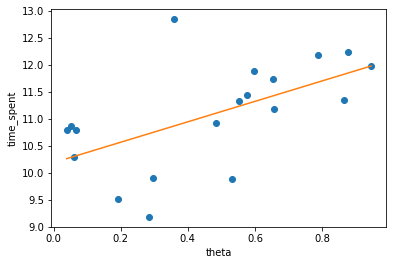

In [405]:
x = df1['theta']
y = df1['time_spent']
plt.plot(x,y,'o')
plt.plot(x,A+B*x,'-')
plt.xlabel("theta")
plt.ylabel("time_spent");

In [406]:
regress_calc(x, y, A, B, theta_report)

R2 = 0.32716648001512477, RSS = 11.829337228295257, RegSS = 5.752035989497417, TSS = 17.581373217792674


In [407]:
regress_tstat(x, y, A, B, 1, theta_report)

In [408]:
theta_report.regress_report_one()

The A = 10.187390486858531, B = 1.8958469391274815, R2 = 0.32716648001512477, RSS = 11.829337228295257, RegSS = 5.752035989497417, TSS = 17.581373217792674, t_A = 6.449417226514113, t_B = 2.875113882530189


# B theta, aux1 and time_spent

In [409]:
theta_aux1_report = regress_report()

In [410]:
x = df1[['theta','aux1']].values
y = df1['time_spent'].values
ones = np.ones(x.shape[0]).reshape(-1,1)
x = np.hstack((x,ones))
w_ = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
w_
B1 = w_[0]
B2 = w_[1]
A = w_[2]
print(f'A={A}, B1={B1}, B2 = {B2}')
theta_aux1_report.A = A
theta_aux1_report.B1 = B1
theta_aux1_report.B2 = B2

A=10.283645737202518, B1=1.7739870140974547, B2 = 0.27796261954851154


In [411]:
regress_calc_two(df1['theta'], df1['aux1'], df1['time_spent'], A, B1, B2, theta_aux1_report)

R2 = 0.3813885891979515, RSS = 10.876038090096078, RegSS = 6.705335127696596, TSS = 17.581373217792674


In [412]:
regress_tstat_two(df1['theta'],df1['aux1'], df1['time_spent'], A, B1, B2, 2, theta_aux1_report)

In [413]:
theta_aux1_report.regress_report_two()

The B1 = 1.7739870140974547, B2 = 0.27796261954851154, R2 = 0.3813885891979515, RSS = 10.876038090096078, RegSS = 6.705335127696596, TSS = 17.581373217792674, t_B1 = 2.7219653559738193, t_B2 = 1.1989088235582022


# C theta, aux2 and time_spent

In [414]:
theta_aux2_report = regress_report()

In [415]:
x = df1[['theta','aux2']].values
y = df1['time_spent'].values
ones = np.ones(x.shape[0]).reshape(-1,1)
x = np.hstack((x,ones))
w_ = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
w_
B1 = w_[0]
B2 = w_[1]
A = w_[2]
print(f'A={A}, B1={B1}, B2 = {B2}')
theta_aux2_report.A = A
theta_aux2_report.B1 = B1
theta_aux2_report.B2 = B2

A=9.964892697273083, B1=2.32425661377999, B2 = 0.6274650811528504


In [416]:
regress_calc_two(df1['theta'], df1['aux2'], df1['time_spent'], A, B1, B2, theta_aux2_report)

R2 = 0.8823200761284402, RSS = 2.0689746618273235, RegSS = 15.512398555965351, TSS = 17.581373217792674


In [417]:
regress_tstat_two(df1['theta'],df1['aux2'], df1['time_spent'], A, B1, B2, 2, theta_aux2_report)

In [418]:
theta_aux2_report.regress_report_two()

The B1 = 2.32425661377999, B2 = 0.6274650811528504, R2 = 0.8823200761284402, RSS = 2.0689746618273235, RegSS = 15.512398555965351, TSS = 17.581373217792674, t_B1 = 8.176623606282002, t_B2 = 8.817665709760577


# D theta, aux1, aux2 and time_spent

In [426]:
theta_aux1_aux2_report = regress_report()

In [427]:
x = df1[['theta','aux1','aux2']].values
y = df1['time_spent'].values
ones = np.ones(x.shape[0]).reshape(-1,1)
x = np.hstack((x,ones))
w_ = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
w_
B1 = w_[0]
B2 = w_[1]
B3 = w_[2]
A = w_[3]
print(f'A={A}, B1={B1}, B2 = {B2}, B3 = {B3}')
theta_aux1_aux2_report.A = A
theta_aux1_aux2_report.B1 = B1
theta_aux1_aux2_report.B2 = B2
theta_aux1_aux2_report.B3 = B3

A=9.920094669515052, B1=2.3876759043922746, B2 = -0.10000621109209118, B3 = 0.6561370794126671


In [428]:
regress_calc_three(df1['theta'], df1['aux1'],df1['aux2'], df1['time_spent'], A, B1, B2, B3, theta_aux1_aux2_report)

R2 = 0.888179612859572, RSS = 1.9659559596739293, RegSS = 15.615417258118745, TSS = 17.581373217792674


In [429]:
regress_tstat_three(df1['theta'],df1['aux1'], df1['aux2'], df1['time_spent'], A, B1, B2, B3, 3, theta_aux1_aux2_report)

In [430]:
theta_aux1_aux2_report.regress_report_three()

The B1 = 2.3876759043922746, B2 = -0.10000621109209118, B3 = -0.10000621109209118, R2 = 0.888179612859572, RSS = 1.9659559596739293, RegSS = 15.615417258118745, TSS = 17.581373217792674, t_B1 = 8.343372612058136, t_B2 = -0.9823377640482508, t_B3 = 9.158724197282332


From these four experiences, from the value of R2, I think (theta, aux2, time_spent) and (theta, aux1, aux2, time_spent) is good. And combined with the t value, I think theta, aux2 is the best in the linear relationship with time_spent.

## 3. Propose a setting for *theta*

Now that you have a model built, you should be able to plot estimated *time_spent* vs. *theta* over a reasonable range of *theta*.  By inspecting that plot -- and knowning that the company wants to maximize the time users spend on the app -- which value of *theta* would you propose the engineers use? Explain how the data and your model support your decision.

The engineer's have capacity to take another set of measurements. Which settings of *theta* do you suggest they measure? Why?


In [432]:
A = theta_aux2_report.A
B1 = theta_aux2_report.B1
B2 = theta_aux2_report.B2

In [433]:
df1

,theta,aux1,aux2,time_spent
0,0.039063,0.539840,0.968205,10.797684
1,0.051194,-1.775282,0.869624,10.876481
2,0.060045,1.314877,0.567783,10.292749
3,0.067900,-0.473448,0.465282,10.787566
4,0.191521,-1.092230,-1.165373,9.518448
5,0.282988,-0.250027,-2.035995,9.180788
6,0.294665,-0.982294,-1.155413,9.900636
7,0.357814,1.031269,3.345157,12.848234
8,0.483529,0.491334,0.126727,10.927435
9,0.530587,-0.446647,-0.694179,9.889276


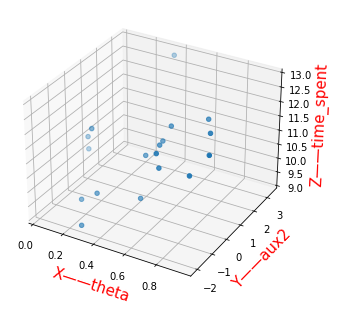

In [446]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df1['theta'], df1['aux2'], df1['time_spent'])
ax.set_zlabel('Z——time_spent', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y——aux2', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X——theta', fontdict={'size': 15, 'color': 'red'})
plt.show()

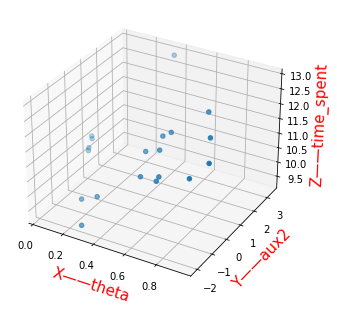

In [447]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df1['theta'], df1['aux2'], A+B1*df1['theta']+B2*df1['aux2'])
ax.set_zlabel('Z——time_spent', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y——aux2', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X——theta', fontdict={'size': 15, 'color': 'red'})
plt.show()

We can know that the theta in the interval between 0.2 to 0.4 has a largest time_soent, so we should consider these interval.

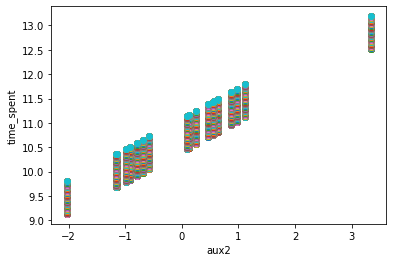

In [480]:
fig = plt.figure()
i = 0.191521
xx = np.arange(0.1915, 0.4835, 0.0001)
xx
for i in xx:
    plt.plot(df1['aux2'],A+B1*i+B2*df1['aux2'],'o')
plt.xlabel('aux2')
plt.ylabel('time_spent')
plt.show();

In [481]:
maxtime = -1
bestthea = 0
for i in xx:
    if maxtime<(A+B1*i+B2*df1['aux2']).mean():
        maxtime = (A+B1*df1['aux2']+B2*i).mean()
        bestthea = i
bestthea

0.48339999999996786

In [482]:
maxtime

10.351803640969928

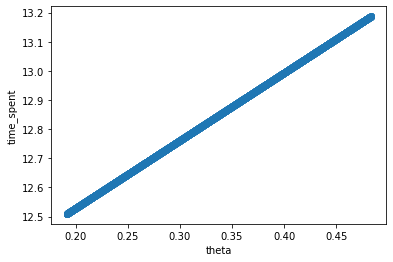

In [483]:
#3.345157
fig = plt.figure()
xx = np.arange(0.1915, 0.4835, 0.0001)
plt.plot(xx,A+B1*xx+B2*3.345157,'o')
plt.xlabel('theta')
plt.ylabel('time_spent')
plt.show();

In [484]:
maxtime = -1
bestthea = 0
for i in xx:
    if maxtime<(A+B1*i+B2*3.345157):
        maxtime = A+B1*i+B2*3.345157
        bestthea = i
print(f'maxtime = {maxtime}, bestthea = {bestthea}')

maxtime = 13.187407552848281, bestthea = 0.48339999999996786


I propose the engineers use theta = 0.48339999999996786 and aux2=3.345157. Because in my model when best theta = 0.48339999999996786, it has the longest time_spent for the user in APP.

If the engineers have the capacity to take another set of measurements, I suggest they use theta=0.357814 when aux2=3.345157 and theta=0.945683 when aux2=3.345157. Because theta=0.357814 has the best performance in origin data, it may be will have a good performance in APP. And in our model, B is greater than 0, which means that it has a strong linear relationship between theta and time_spent in that interval. As the theta increase, the time_spent will increase. So we better test the largest theta in that interval. Compare them the pick up the largest.

## 4. Experiment or observation?

Is this data set experimental or observational? Explain clearly. Consider how the effect of *theta* on *time_spent* differs from the effect of *aux1* or *aux2*.

theta and time_spent are experimental because the engineer set the different values for it to do such an experience and record it. aux1, aux2 and time_spent are observational because the engineer collects them from theta experience and identified these two auxiliary features. From our analysis, we can see that all of the B1 is greater than 1 whatever it combine with aux1, aux2 or not and B2, B3 are less than 1. So theta has a bigger influence for time_spent than aux1 and aux2. On the other hand, aux2 has a more obvious linear relationship with time_spent than theta and aux1, so we are better to consider using theta and aux2.

## Presentation 

You will give a 5 minute presentation in class. Your presentation should focus on step 3, above: Summarize your results, display any relevant visualization, and provide guidance to the engineers in the form of recommended setting for *theta*. Also please let the engineers know which value(s) of *theta* you think they should measure next.